# Comparison between Wave propagation Method (WPM) and Beam Propagation Method (BPM)

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from matplotlib import cm


In [2]:
x0 = np.linspace(-500 * um, 500 * um, 1024 * 4)
z0 = np.linspace(-0.1 * mm, 1.25 * mm, 1024 * 2)
wavelength = 25 * um

logarithm_drawing = 0


In [3]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

**BPM**

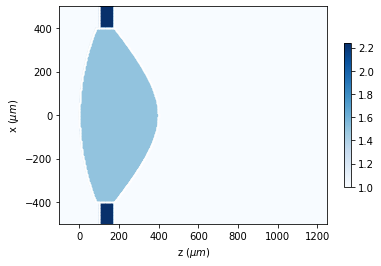

In [4]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lens.aspheric_lens(r0=(0 * mm, 0 * mm),
                                  angle=(0 * degrees, (0 * mm, 0 * mm)),
                                  refraction_index=1.5,
                                  cx=(1 / (1 * mm), -1 / (.25 * mm)),
                                  Qx=(0, 0),
                                  a2=(0, 1e-13),
                                  a3=(0, 0),
                                  a4=(0, 0),
                                  depth=.4 * mm,
                                  size=0.8 * mm)

lens.slit(r0=(0, 100 * um),
          aperture=800 * um,
          depth=75 * um,
          refraction_index=1 + 2j)

lens.draw_refraction_index(draw_borders=True,
                           min_incr=0.01,
                           colorbar_kind='vertical')


In [5]:
lens.smooth_refraction_index(type_filter=2, pixels_filtering=25)


In [6]:
lens.incident_field(u0)

In [7]:
%%time
lens.clear_field()
lens.BPM(verbose=False)

CPU times: user 1.33 s, sys: 72.1 ms, total: 1.41 s
Wall time: 1.4 s


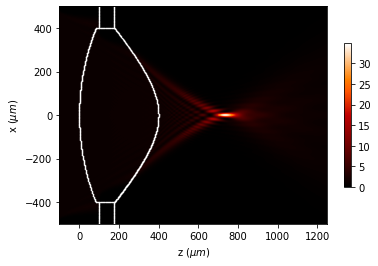

In [8]:
lens.draw(kind='intensity',
          logarithm=logarithm_drawing,
          draw_borders=True,
          colorbar_kind='vertical')


In [9]:
Intensity_BPM = lens.intensity()

**Focusing area**

In [10]:
x_f_bmp, z_f_bmp = lens.search_focus()


x = -0.122 um, z = 736.908 um


In [11]:
ylim_max = 50 * um
zlim_max = 300 * um


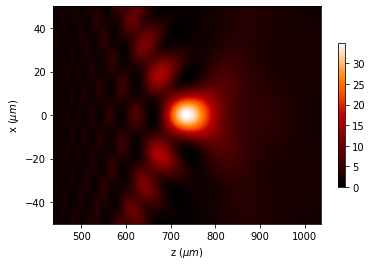

In [12]:
lens.draw(kind='intensity',
          logarithm=logarithm_drawing,
          colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_bmp - zlim_max, z_f_bmp + zlim_max)


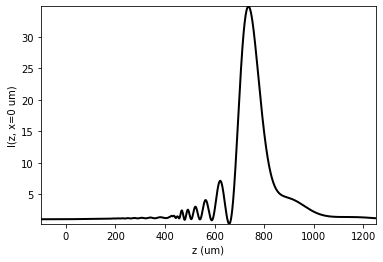

In [13]:
lens.profile_longitudinal(kind='intensity', logarithm=logarithm_drawing, x0=0)


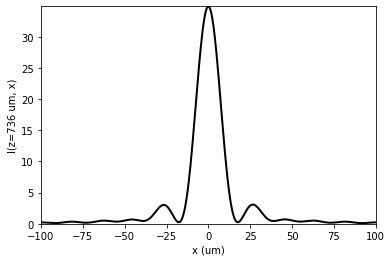

In [14]:
lens.profile_transversal(kind='intensity',
                         logarithm=logarithm_drawing,
                         z0=z_f_bmp)
plt.xlim(-100, 100)


**WPM**

In [15]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

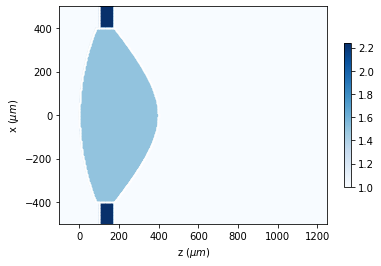

In [16]:
lens2 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lens2.aspheric_lens(r0=(0 * mm, 0 * mm),
                                   angle=(0 * degrees, (0 * mm, 0 * mm)),
                                   refraction_index=1.5,
                                   cx=(1 / (1 * mm), -1 / (.25 * mm)),
                                   Qx=(0, 0),
                                   a2=(0, 1e-13),
                                   a3=(0, 0),
                                   a4=(0, 0),
                                   depth=.4 * mm,
                                   size=0.8 * mm)

lens2.slit(r0=(0, 100 * um),
           aperture=800 * um,
           depth=75 * um,
           refraction_index=1 + 2j)

lens2.draw_refraction_index(draw_borders=True,
                            min_incr=0.01,
                            colorbar_kind='vertical')


In [17]:
lens2.smooth_refraction_index(type_filter=2, pixels_filtering=25)
lens2.discretize_refraction_index(num_layers=6)

In [18]:
lens2.incident_field(u0)

In [19]:
lens2.clear_field()
lens2.WPM(verbose=False)

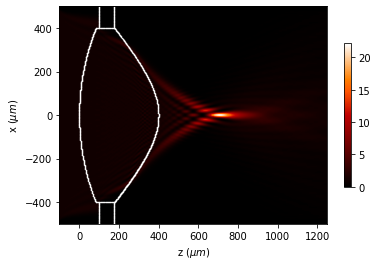

In [20]:
lens2.draw(kind='intensity',
           logarithm=logarithm_drawing,
           normalize=None,
           draw_borders=True,
           colorbar_kind='vertical')


In [21]:
Intensity_WPM = lens2.intensity()

In [22]:
x_f_wpm, z_f_wpm = lens2.search_focus()


x = -0.122 um, z = 710.528 um


**Focusing area**

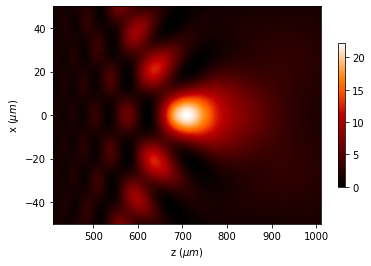

In [23]:
lens2.draw(kind='intensity',
           logarithm=logarithm_drawing,
           colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)


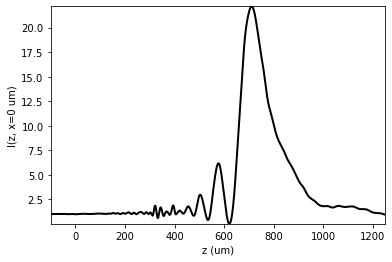

In [24]:
lens2.profile_longitudinal(kind='intensity', logarithm=logarithm_drawing, x0=0)


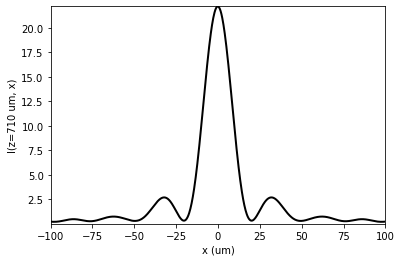

In [25]:
lens2.profile_transversal(kind='intensity',
                          logarithm=logarithm_drawing,
                          z0=z_f_wpm)
plt.xlim(-100, 100)


## Diferences

In [26]:
Intensity_diff = (Intensity_WPM / Intensity_WPM.max() -
                  Intensity_BPM / Intensity_BPM.max())


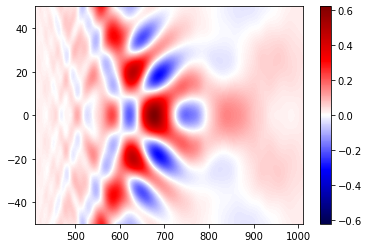

In [27]:
extension = [lens2.z[0], lens2.z[-1], lens2.x[0], lens2.x[-1]]

h1 = plt.imshow(Intensity_diff,
                interpolation='bilinear',
                aspect='auto',
                origin='lower',
                extent=extension)
plt.axis(extension)

h1.set_cmap(cm.seismic)  # OrRd # Reds_r gist_heat
h1.set_clim(-Intensity_diff.max(), Intensity_diff.max())
plt.colorbar(orientation='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)


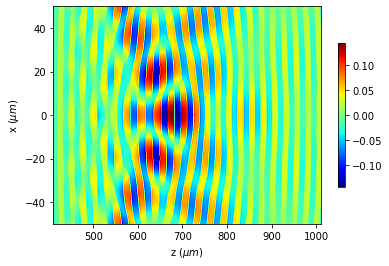

In [28]:
diff = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
diff.u = lens2.u / Intensity_WPM.max() - lens.u / Intensity_BPM.max()

diff.draw(kind='amplitude', logarithm=False, colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)


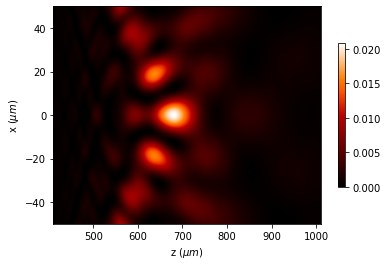

In [29]:
diff.draw(kind='intensity', logarithm=False, colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f_wpm - zlim_max, z_f_wpm + zlim_max)


In [30]:
# focal shift

focal_shift = z_f_wpm - z_f_bmp

print("Dz = {:2.2f} um".format(focal_shift))

Dz = -26.38 um
